In [0]:
import numpy as np
a = np.random.random((10,3))
print(a)
mark = (np.abs(0.5 - a).argmin(axis = 1))
print(mark)
for i in range(10):
  print( a[i][mark [i]])

In [0]:
import numpy as np
a = np.random.random((6,6))
print(a)
mask = a.sum(axis = 1)/a.min(axis=1)
print(mask)

[[0.14479003 0.35490585 0.3472675  0.52182663 0.99268253 0.69746554]
 [0.53739355 0.14469127 0.37141382 0.6176925  0.52204994 0.06208617]
 [0.55044825 0.3387196  0.41576655 0.15386904 0.92497139 0.53079099]
 [0.45960981 0.94569666 0.30411098 0.92492185 0.85477844 0.23307999]
 [0.34635755 0.75509537 0.31805753 0.05350428 0.26245849 0.88703171]
 [0.88251214 0.60222055 0.459266   0.54179498 0.90511499 0.15453575]]
[21.12671781 36.32576013 18.94185958 15.96961505 49.01485963 22.94255099]


In [0]:
import numpy as np
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
max(x[i] for i in range(1, len(x)) if x[i-1] == 0)

5

In [0]:
import numpy as np
x = np.ones(10)
y = np.array([0, 1, 2, 3, 5, 5, 5, 8])
for i in y:
  x[i] += 1
print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [0]:
import numpy as np
a = np.arange(16).reshape(4, 4)
d = { i : [a[k][l] for k in range(4) for l in range(4) if k+l ==i] for i in range(7)}
print(d)

{0: [0], 1: [1, 4], 2: [2, 5, 8], 3: [3, 6, 9, 12], 4: [7, 10, 13], 5: [11, 14], 6: [15]}


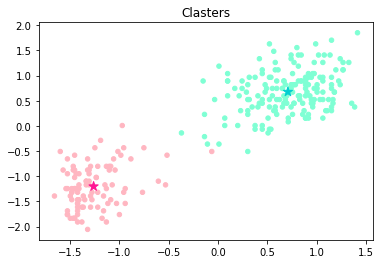

In [10]:
import numpy as np
import scipy.cluster
import matplotlib.pyplot as plt
    
    
ata = np.loadtxt('http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat', skiprows=26)[:, 1:]
data = (data - data.mean(axis=0)) / data.std(axis=0)

def get_labels(pts, centroids):
    
    dist = np.hstack([np.linalg.norm(pts - centroid, axis=1).reshape(-1, 1) for centroid in centroids])
    return np.argmin(dist, axis=1)

def normtotal(obs, centroids, labels):
    temp = 0
    for i in range(centroids.shape[0]):
        temp += abs(np.linalg.norm(obs[i==labels] - centroids[i], axis = 1).sum())
    return temp
def kmeans(obs, k_or_guess, iter = 20, thresh = 1e-05):
    centroids = np.random.random((k_or_guess, obs.shape[1]))
    labels = get_labels(obs, centroids)
    norminitial = normtotal(obs, centroids, labels)
    minnorm = norminitial
    newcetroids = centroids
    
    for i in range(iter):
        normstop = norminitial
        centroids = np.array([obs[labels == i].mean(axis = 0) for i in range (k_or_guess)])
        labels = get_labels(obs, centroids)
        norminitial = normtotal(obs, centroids, labels)
        if norminitial < minnorm:
            newcetroids = centroids
            minnorm = norminitial
        if abs(norminitial - normstop) < thresh: 
            break
            
    return newcetroids
centroids = kmeans(data, 2)
labels = get_labels(data, centroids)
plt.scatter(*data.T, c=np.where(labels, "aquamarine","lightpink"), s=20)
plt.scatter(*centroids.T, c=["deeppink", "darkturquoise"], s=95, marker='*')
plt.title('Clasters')
plt.show()






